# Using function from portable module

## Import the custom library

In [7]:
import sys
sys.path.append('../../')

In [8]:
import esios

## Use the function indicator data

> You might get some errors, reflect about them and fix them in the source file
>
> You need to **restart the kernel** everytime you want to execute the changes in the library

In [9]:
data = esios.indicator_data(indicator=10010, start_date='2022-01-01', end_date='2022-12-31')
df = esios.dataframe_p48(data)

df

,Eólica
datetime,
2022-01-01 00:00:00+01:00,6380.800
2022-01-01 01:00:00+01:00,6563.300
...,...
2022-12-30 23:00:00+01:00,11474.700
2022-12-31 00:00:00+01:00,2195.925


## Process the data for 5 indicators

### Create a list with the 5 indicators

In [10]:
indicators = [10010, 10011, 10012, 10013, 10014]
indicators

[10010, 10011, 10012, 10013, 10014]

### Create an empty list to save the processed data in each loop

In [11]:
list_df = []

### Iterate over all indicators to get the data

In [12]:
for indicator in indicators:
    print(indicator)
    
    data = esios.indicator_data(indicator=indicator, start_date='2022-01-01', end_date='2022-12-31')
    df = esios.dataframe_p48(data)

    list_df.append(df)

10010
10011
10012
10013
10014


### Concat all the `DataFrames` into a single one

In [13]:
import pandas as pd

df = pd.concat(list_df, axis=1)
df

,Eólica,Cogeneración,Residuos no renovables,otras renovables,Saldo Portugal
datetime,,,,,
2022-01-01 00:00:00+01:00,6380.800,1742.800,312.500,584.100,-761.100
2022-01-01 01:00:00+01:00,6563.300,1729.100,313.900,572.900,-1673.800
...,...,...,...,...,...
2022-12-30 23:00:00+01:00,11474.700,841.300,264.800,258.000,2097.100
2022-12-31 00:00:00+01:00,2195.925,212.425,65.525,66.075,713.925


## Process the data for all p48 technologies

### Import the indicators

In [14]:
df_indicators = pd.read_excel('../../../data/indicators.xlsx', index_col='id')

### Make the `DataFrame` interactive with `itables` library


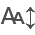

In [18]:
from itables import init_notebook_mode, show #!

init_notebook_mode(all_interactive=False)

In [19]:
show(
    df_indicators,
    search={'regex': True, 'caseInsensitive': True},
    columnDefs=[{'className': 'dt-left', 'targets': '_all'}],
    column_filters='header',
    classes='display cell-border',
    lengthMenu=[2, 5, 10, 20, 50]
) #!

Loading ITables v2.0.1 from the init_notebook_mode cell... (need help?)


### Put the names of selected indicators in a list

In [20]:
technologies = [
    # 'Generación programada P48 Hidráulica',
    'Generación programada P48 UGH + no UGH',
    'Generación programada P48 Eólica',
    'Generación programada P48 Solar fotovoltaica',
    'Generación programada P48 Solar térmica',
    # 'Generación programada P48 Otras renovables',
    'Generación programada P48 otras renovables',
    'Generación programada P48 Nuclear',
    'Generación programada P48 Turbinación bombeo',
    'Generación programada P48 Ciclo combinado',
    'Generación programada P48 Carbón',
    # 'Generación programada P48 Fuel-Gas',
    'Generación programada P48 Cogeneración',
    'Generación programada P48 Residuos no renovables',
    'Generación programada P48 Consumo bombeo',
    'Generación programada P48 Enlace Baleares',
    'Generación programada P48 Saldo Francia',
    'Generación programada P48 Saldo Portugal',
    'Generación programada P48 Saldo Marruecos',
    'Generación programada P48 Saldo Andorra',
    'Ajuste de programas p48'
] #!

### Filter the `DataFrame` and get the `id`s

In [21]:
mask = df_indicators.name.isin(technologies)
indicators = df_indicators[mask].index
indicators

Index([   73,    74,    79,    84,    85,    95,    96, 10008, 10010, 10011,
       10012, 10013, 10014, 10015, 10016, 10017, 10025, 10063],
      dtype='int64', name='id')

### Create an empty list to save the processed data in each loop

In [44]:
list_df = []

### Iterate over all indicators to get the data

In [45]:
for indicator in indicators:
    print(indicator)
    
    data = esios.indicator_data(indicator=indicator, start_date='2022-01-01', end_date='2022-12-31T23')
    df = esios.dataframe_p48(data)

    list_df.append(df)

73
74
79
84
85
95
96
10008
10010
10011
10012
10013
10014
10015
10016
10017
10025
10063


## Concat all the `DataFrames` into a single one

In [46]:
df_p48 = pd.concat(list_df, axis=1)
df_p48

,Turbinación bombeo,Nuclear,Ciclo combinado,Solar fotovoltaica,Solar térmica,Consumo bombeo,Enlace Baleares,Carbón,Eólica,Cogeneración,Residuos no renovables,otras renovables,Saldo Portugal,Saldo Francia,Saldo Marruecos,Saldo Andorra,Ajuste P48,Hidráulica
datetime,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+01:00,50.000,6096.70,1885.40,7.1,10.0,-1243.0,-40.8,810.0,6380.800,1742.8,312.500,584.1,-761.10,3330.0,33.0,-44.0,NaN,2171.6
2022-01-01 01:00:00+01:00,NaN,6098.60,1948.80,19.1,10.0,-1688.0,-40.8,815.0,6563.300,1729.1,313.900,572.9,-1673.80,3330.0,133.0,-42.0,100.0,2075.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:00:00+01:00,823.625,6457.75,1725.00,1.7,NaN,-1846.7,-153.0,260.0,8871.225,760.6,264.700,259.2,3355.00,-1715.8,-740.0,-67.0,-200.0,4055.5
2022-12-31 23:00:00+01:00,134.500,1604.80,526.45,0.4,NaN,-609.9,-32.0,65.0,1909.925,190.4,66.225,64.3,688.75,-64.5,-187.5,-15.5,-50.0,998.8


In [47]:
df_p48 = df_p48.fillna(0)
df_p48.duplicated().sum()

0

## Export to Excel

In [48]:
df_p48 = df_p48.to_period('h')

/var/folders/89/hqh4vvhn24q2xc8ph93krqz80000gn/T/ipykernel_51689/3890678607.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_p48 = df_p48.to_period('h')


In [49]:
df_p48.index

PeriodIndex(['2022-01-01 00:00', '2022-01-01 01:00', '2022-01-01 02:00',
             '2022-01-01 03:00', '2022-01-01 04:00', '2022-01-01 05:00',
             '2022-01-01 06:00', '2022-01-01 07:00', '2022-01-01 08:00',
             '2022-01-01 09:00',
             ...
             '2022-12-31 14:00', '2022-12-31 15:00', '2022-12-31 16:00',
             '2022-12-31 17:00', '2022-12-31 18:00', '2022-12-31 19:00',
             '2022-12-31 20:00', '2022-12-31 21:00', '2022-12-31 22:00',
             '2022-12-31 23:00'],
            dtype='period[H]', name='datetime', length=8760)

In [50]:
df_p48.index = df_p48.index.astype(str)

In [51]:
df_p48.to_excel('../../../data/p48_2022.xlsx')